# Homework 1
Eric Gagliano (egagli)

In this homework assignment we will work start with programming and data visualization to better qualitatively understand the types of datasets that we'll be using the rest of the quarter. Please download the notebooks at the top of this page and use them as reference for your coding. Be sure to save your work for later reference, as you will see these datasets again!

# Exploring Non-Stationary Flood Statistics

Download the files containing observed instantaneous peak flow data for the Sauk River and Skykomish River in western Washington. If you are interested in other rivers, e.g., for your project, these data can be obtained from the USGS.

Note that annual peak flows are reported by water year (Oct 1 of the previous calendar year to September 30), so some calendar years appear to have two values. Water years are shown in an additional column in the excel files. For the purposes of this assignment, we will only consider peak flows by water year, and the years requested below refer to water years. (For example, the first flood reported in the Skykomish occurred on Oct 10, 1928 – this is the flood of water year 1929.)

## A. Plot the data from the Sauk River and Skykomish River as a time series from 1929-2020. Use different color lines or symbols to distinguish the two rivers. Be sure to label your axes appropriately and use plt.legend() to create a legend. Describe qualitatively any changes you see in these records through time. Is there a common theme between the two sites?

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
Skykomish_data_file = 'Skykomish_peak_flow_12134500_skykomish_river_near_gold_bar.xlsx'
Skykomish_data = pd.read_excel(Skykomish_data_file)
Sauk_data_file = 'Sauk_peak_WY1929_2017.xlsx'
Sauk_data = pd.read_excel(Sauk_data_file,header=6)
Sauk_data = Sauk_data[1:]

/opt/conda/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [48]:
Sauk_data

,water_year,peak_dt,peak_va,gage_ht
1,1929,1928-10-09 00:00:00,21800,9.33
2,1930,1930-02-05 00:00:00,15200,7.99
3,1931,1931-01-28 00:00:00,21800,9.32
4,1932,1932-02-26 00:00:00,68500,15.83
5,1933,1932-11-13 00:00:00,42500,12.62
...,...,...,...,...
88,2016,2015-11-17 00:00:00,52800,14.28
89,2017,2016-10-20 00:00:00,33700,11.63
90,2018,2017-11-23 00:00:00,61900,14.09
91,2019,2018-11-27 00:00:00,27900,9.87


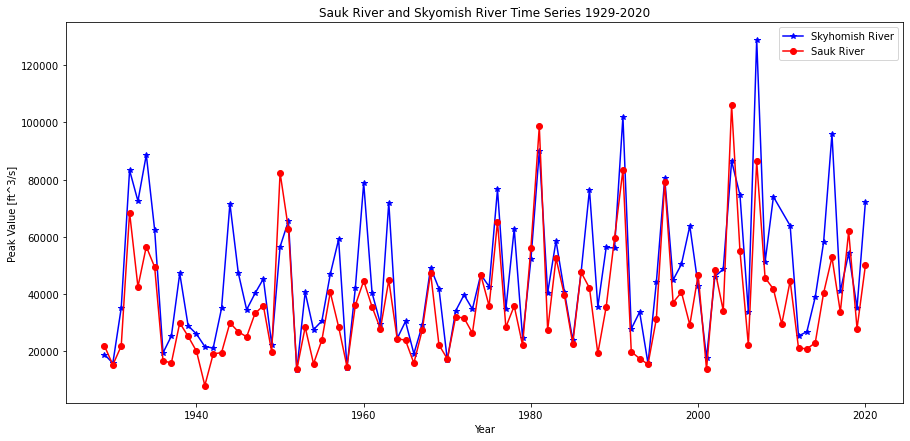

In [55]:
f,ax = plt.subplots(figsize=(15,7))
ax.plot(Skykomish_data['water year'],Skykomish_data['peak value (cfs)'],'b-*',label='Skyhomish River')
ax.plot(Sauk_data['water_year'],Sauk_data['peak_va'],'o-r',label='Sauk River')
ax.set_title('Sauk River and Skyomish River Time Series 1929-2020')
ax.set_xlabel('Year')
ax.set_ylabel('Peak Value [ft^3/s]')
ax.legend()

Though peak flow values tend to be offset from one another (generally, Skyhomish having higher values than Sauk), both rivers tend to vary together in similar ways. For example, in years where the Skyhomish River experiences a high peak value relative to the rest of the time series, the Sauk River tends to also experience a high peak value relative to its other values in the time series. This trend of similar peak value behavior can be described as correlated. 

## B. We know that in water year 1977, there was a large PDO shift in the North Pacific, and we want to know if floods were statistically different before and after this date. In this homework, we will graphically examine the data. For the Sauk River only, create and examine the following plots for three time periods: the entire timeseries, all data before 1977, all data from 1977 and later. (Make sure that the following plots are well-labeled, readable, and convey meaningful information)

First, let's subset the data:

In [59]:
Sauk_data_before_1977 = Sauk_data[Sauk_data['water_year']<1977]
Sauk_data_after_1977 = Sauk_data[Sauk_data['water_year']>=1977]

1. Histograms for the Sauk River for the entire period and the two sub-periods (3 histograms total)

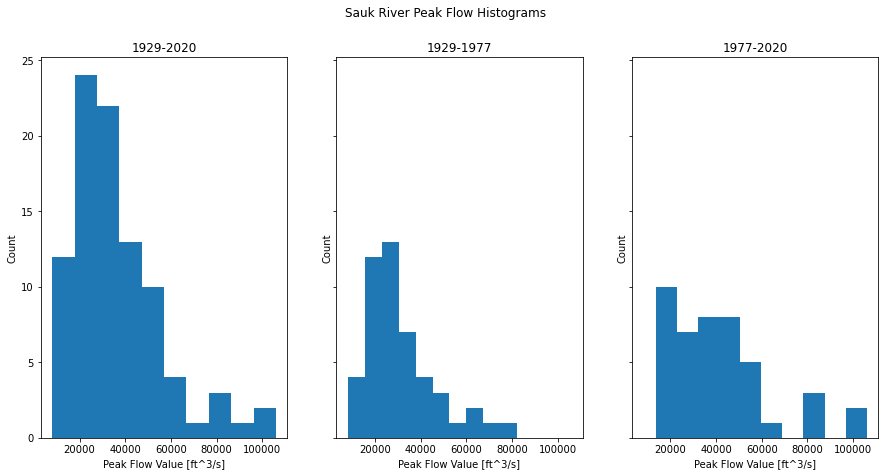

In [74]:
f,ax = plt.subplots(1,3,figsize=(15,7),sharey=True,sharex=True)
ax[0].hist(Sauk_data['peak_va'],bins=10)
ax[1].hist(Sauk_data_before_1977['peak_va'],bins=10)
ax[2].hist(Sauk_data_after_1977['peak_va'],bins=10)
ax[0].set_title('1929-2020')
ax[1].set_title('1929-1977')
ax[2].set_title('1977-2020')
f.suptitle('Sauk River Peak Flow Histograms')
for axs in ax:
    axs.set_xlabel('Peak Flow Value [ft^3/s]')
    axs.set_ylabel('Count')

2. Quantile plots using the Cunnane plotting position (see section 2.1.3 in Helsel et al., 2020) for the Sauk River for the entire period and the two sub-periods. Plot all three lines on the same figure, with different line types/colors and a legend.

3. Probability Density Functions (PDFs) for the Sauk River for the entire period and the two sub-periods. The 3 plots should be plotted on one graph, with different line types and a legend.

4. Estimate the sample mean and standard deviation for each of the two sub-periods (before and after 1977). Assuming a Gaussian (normal) distribution, add theoretical quantile curves to the quantile plots you made earlier. (Theoretical meaning that you're plotting Gaussian Cumulative Density Functions (CDFs) that have the same mean and standard deviation that you calculate). (The plot should now have 6 lines on it – please choose colors and line types to help distinguis them, and label carefully.)

5. Box and whisker plots for each of for the entire period and the two sub-periods, with appropriate labels.

## C. Based on all the plots you have now created, write few sentences in a markdown cell discussing whether or not you think a change has occurred in the peak flows around 1977. Be sure to reference your plots (Fig. 1, Fig. 2, etc.) when you discuss them.

For information on each module and function, including what they return or their arguments, look at the documentation at https://docs.python.org/3/. Use the search bar to find information about any module or function.

Also, notice the comments in the code above. The comments begin with a # symbol which means that the line will not be recognized and run as code by the computer. Rather, they serve as communication about the piece of code to another person reading it. When commenting code, too much is better than not enough. Comments will help you debug code and troubleshoot issues more quickly and effectively.

### Variables and Data Types
Next, we will define some variables. Variables store values and can be changed by code. They can be integers, floats (numbers that can have a decimal), or strings (character string, written in quotation marks). When naming variables, use clarity over cleverness. Name them logically so that you or another person can recognize their function in your code.

In [4]:
# int variable
y = -38

# float variables
z = 9.
k = -2.89

# string variables
year = "2019"
lab_title = "Lab 1.1"

To display these variables, use the print() function.

In [5]:
print(y)

print(7+y)

print(z)

print(k)

print("Hello world")

-38
-31
9.0
-2.89
Hello world


To see the data type of each variable, use the type() function.
Here we use print() to print out the result of the type() function.

In [6]:
print(type(y))

print(type(7+y))

print(type(z))

print(type(k))

print(type("Hello world"))

<class 'int'>
<class 'int'>
<class 'float'>
<class 'float'>
<class 'str'>


Python has a built-in data structure called a "list".

In [7]:
# Define lists
list_of_words = ["river", "lake", "ocean"]
list_of_numbers = [2, 8, 9]

print(list_of_words)
print(list_of_numbers)

['river', 'lake', 'ocean']
[2, 8, 9]


In [8]:
# To access a certain part of a list, use name_of_list[index].
# The index starts at 0, so the first component of a list has index 0.
print(list_of_words[0])
print(list_of_numbers[0])

river
2


In [9]:
# Change one or more parts of a list using the index.
list_of_words[2] = 'glacier'
list_of_numbers[1] = 10

print(list_of_words)
print(list_of_numbers)

['river', 'lake', 'glacier']
[2, 10, 9]


### For Loops and If Statements
For loops use an index to iterate through a section of code multiple times.

In [10]:
# You can use for loops to go through a list.
# This for loop prints out every string in the array list_of_names
for word in list_of_words:
    print(word)


river
lake
glacier


In [11]:
# Use the range function for the loop index.
# This for loop prints every number from 3 to 7.
for i in range(3,7):
    print(i)

3
4
5
6


In [12]:
# Use enumerate to go through a list to get the value and its index
# the len() function. 
for i, word in enumerate(list_of_words):
    print('At index {index_placeholder}, we have the word {word_placeholder}'.format(index_placeholder=i,word_placeholder=word))

At index 0, we have the word river
At index 1, we have the word lake
At index 2, we have the word glacier


If statements will only go through the code if the logical expression is true.

In [13]:
# This for loop combined with the if/else statements will print every number in this list if its square root is greater than or equal to 6.

square_nums = [3**2, 4**2, 5**2, 6**2, 7**2, 8**2] # python notation for raising x to the power of y is x**y

for n in square_nums:
    if np.sqrt(n) <= 6:
        print("The square root of {} is less than 6".format(n))
    else:
        print("The quare root of {} is greater than 6".format(n))

The square root of 9 is less than 6
The square root of 16 is less than 6
The square root of 25 is less than 6
The square root of 36 is less than 6
The quare root of 49 is greater than 6
The quare root of 64 is greater than 6


---
## Plotting with matplotlib
Matplotlib is the plotting and visualization package we'll use the most in this class. (However, if you have another favorite, you're free to use another plotting package. We'll cover graphics and data visualization in a later week.) Below are some important functions used to plot or manipulate plots.

In [14]:
# First, remember that we must import the module that has the functions needed.
import matplotlib.pyplot as plt

# Next, for jupyter notebooks, we have to use an "iPython Magic function" (indicated with the %) to make the matplotlib imageres appear in the notebook so that we can see them.
# Note that this function is specific to the jupyter notebook and only needs to be executed once per notebook
%matplotlib inline

Create some data using the [np.linspace() function](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html).

In [15]:
x = np.linspace(0,10,100)

# make y some function of x
y = x**2

Text(0.5, 1.0, 'My First Plot')

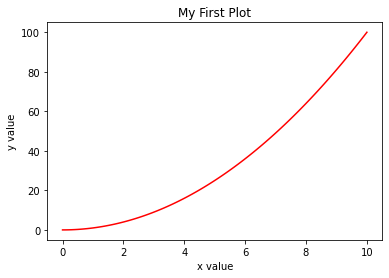

In [16]:
# Create a new figure
plt.figure()

# Plot x and y in the color red. Try changing the color. Use the documentation to see which colors you can use.
plt.plot(x, y, 'red')

# Label the axes and title
plt.xlabel('x value')
plt.ylabel('y value')
plt.title('My First Plot')

---
## Plotting real data

Now, we will plot data in Python using a real-world dataset.
Start by importing some other libraries we'll need.

We will use the [pandas](https://pandas.pydata.org/) library a lot in this class. It is another core library of the "scientific python ecosystem".

In [17]:
# import pandas, which will let us read in .xlsx (Excel) files as "data frames"
import pandas as pd

# We want to import a normal gaussian curve function from the scipy.stats library
# Since we don't need the entire scipy.stats library, we add "import norm" to only import this norm function and not the whole library
from scipy.stats import norm

Next, open the data file. We can do this using the pandas [read_excel function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html).

In [18]:
# Define the filepath and filename of the file with our data
Skykomish_data_file = 'Skykomish_peak_flow_12134500_skykomish_river_near_gold_bar.xlsx'

# Use pandas.read_excel() function to open this file.
# This stores the data in a "Data Frame" and we can use it to plot the data later.
Skykomish_data = pd.read_excel(Skykomish_data_file)

/opt/conda/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


We can preview the first few rows of data with the `.head()` method

In [19]:
# Now we can see the dataset we loaded:
Skykomish_data.head()

,date of peak,water year,peak value (cfs),gage_ht (feet)
0,1928-10-09,1929,18800,10.55
1,1930-02-05,1930,15800,10.44
2,1931-01-28,1931,35100,14.08
3,1932-02-26,1932,83300,20.70
4,1932-11-13,1933,72500,19.50


We can access a column of this data frame by using the header name within brackets as follows:

In [20]:
# look at the column named 'peak value (cfs)'
Skykomish_data['peak value (cfs)']

0      18800
1      15800
2      35100
3      83300
4      72500
       ...  
76     74600
77     33800
78    129000
79     51100
80     74000
Name: peak value (cfs), Length: 81, dtype: int64

### Plot Timeseries
Next, create a timeseries of the data using the arrays created above and the matplotlib module.

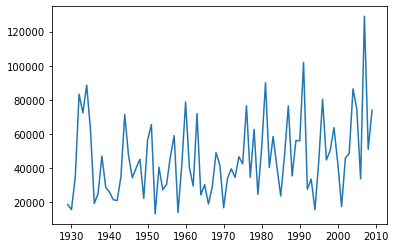

In [21]:
# Create a new figure.
plt.figure()

# Use the plot() function to plot the year on the x-axis, peak flow values on
# the y-axis with an open circle representing each peak flow value.
plt.plot(Skykomish_data['water year'], # our x value
         Skykomish_data['peak value (cfs)'] # our y value
         )

### This plot is missing labels, units, and a title!

We can use some of matplotlib's features to improve our plot. **Always include axes labels, units, and a title!**

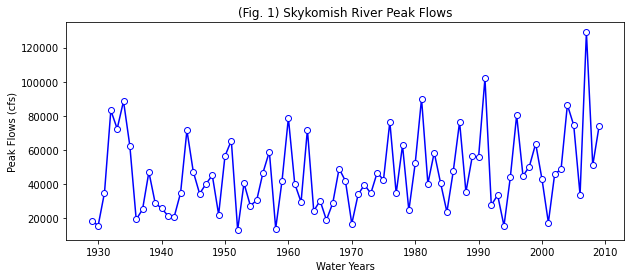

In [22]:
# Create a new figure.
plt.figure(figsize=(10,4))

# Use the plot() function to plot the year on the x-axis, peak flow values on
# the y-axis with an open circle representing each peak flow value.
plt.plot(Skykomish_data['water year'], # our x value
         Skykomish_data['peak value (cfs)'], # our y value
         linestyle='-', # plot a solid line
         color='blue', # make the line color blue
         marker='o', # also plot a circle for each data point
         markerfacecolor='white',  # make the circle face color white
         markeredgecolor='blue') # make the circle edge color blue

# Label the axes and title.
plt.xlabel('Water Years')
plt.ylabel('Peak Flows (cfs)')
plt.title('(Fig. 1) Skykomish River Peak Flows');

### Histogram
Finally, let's plot a histogram of the peak flow values.

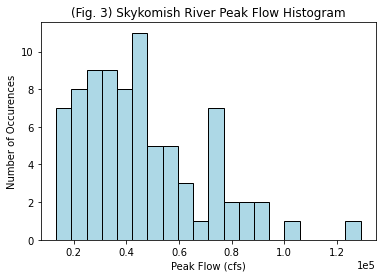

In [23]:
# Define the number of bins for the histogram. Try changing this number and running this cell again
nbins = 20

# Create a new figure.
plt.figure()

# Use the hist() function from matplotlib to plot the histogram
plt.hist(Skykomish_data['peak value (cfs)'], nbins, ec="black", facecolor='lightblue')

# Labels and title
plt.title('(Fig. 3) Skykomish River Peak Flow Histogram')
plt.xlabel('Peak Flow (cfs)')
plt.ylabel('Number of Occurences')
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0)) # formatting the x axis to use scientific notation